## Librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal

## Problema 1

Considere las dos caracteristicas "Alcohol level" y "Alcalinity level" del conjunto de datos [wine_data](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html). 

In [3]:
# load data
from sklearn.datasets import load_wine
import scipy.stats

alcohol_levels = load_wine()['data'][:, [0]].ravel()
alcalinity_levels = load_wine()['data'][:, [3]].ravel()

alcohol_levels.shape, alcalinity_levels.shape

((178,), (178,))

a) A partir de esas dos caracteristicas del vino, calcule el vector $\vec{\mu}$ y la matrix de covarianza $\Sigma$, 

$$
\vec{\mu} = \begin{bmatrix}
\mu_x\\
\mu_y
\end{bmatrix}, \quad \Sigma = \begin{bmatrix}
\text{Var}(x) & \text{Cov}(x, y)\\
\text{Cov}(y, x) & \text{Var}(y)
\end{bmatrix}
$$

In [19]:
covar = np.zeros((2, 2))
mu = np.zeros(2)
## Tu codigo aqui
x = alcohol_levels
y = alcalinity_levels

mu[0] = np.mean(x)
mu[1] = np.mean(y)

covar[0][0] = np.sum((x-mu[0])**2) / len(x)
covar[0][1] = np.sum((x-mu[0])*(y-mu[1])) / len(x)
covar[1][0] = np.sum((y-mu[1])*(x-mu[0])) / len(y)
covar[1][1] = np.sum((y-mu[1])**2) / len(y)

print(mu, covar)

[13.00061798 19.49494382] [[ 0.65535973 -0.83636766]
 [-0.83636766 11.09003061]]


b) Gráfique los puntos del problema, con alcohol levels en x, y alcalinity levels en y

Text(0, 0.5, 'Alcalinity levels')

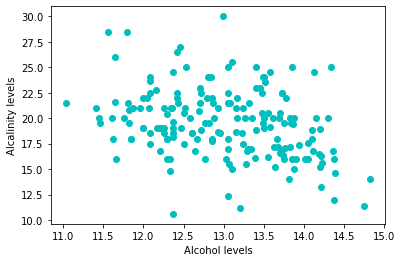

In [20]:
# tu codigo aqui
plt.scatter(x,y,color='c')
plt.xlabel('Alcohol levels')
plt.ylabel('Alcalinity levels')

c) A partir del la matriz de covarianza se puede obtener una función de de densidad de probabilidad de los datos como una Gaussiana bivariada, cuya fórmula está dada por, 

$$
  f(\mathbf{x}) = \frac{1}{\sqrt{(2\pi)^k\text{det}(\Sigma)}}\exp\Big(-\frac{1}{2}(\mathbf{x}- \mathbf{\mu})^T\Sigma^{-1}(\mathbf{x}-\mathbf{\mu})\Big)
$$

Donde $\mathbf{\mu}$, es el promedio, $\Sigma$ la matriz de covarianza, y $k$, el orden de la gausiana multivariada.

Use la siguiente implementación para gráficar la función de densidad de probabilidad bivariada. [Bivariate](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html)

Tenga en cuenta los límites



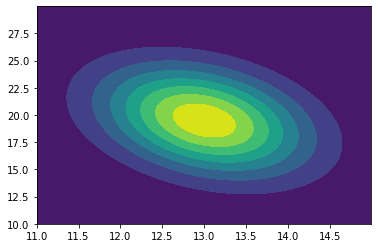

In [25]:
# tu codigo aqui
x, y = np.mgrid[11:15:.01, 10:30:.01]
pos = np.dstack((x, y))
rv = multivariate_normal(mu, covar)
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(x, y, rv.pdf(pos))

d) A partir de la función de densidad, La correlación de los datos es positiva, negativa o nula? Por qué?

Dada la gráfica se puede observar que la correlación de los datos es negativa ya que su función de densidad comienza a disminuir a medida que se avanzan en los datos. Esto se puede interpretar también como la dismunución de la relación entre las varibales de tal manera que sea más probable una que la otra.

## Problema 2 (continuación)

e) Diagonalice la matriz de covarianza, es decir imprima los valores propios y vectores propios de la matriz de covarianza

In [28]:
# Tu codigo aquí
eig_values, eig_vectors = np.linalg.eig(covar)

f) A partir de los vectores propios y valores propios de la matriz, y el vector $\vec{\mu}$.

*   Desplace los datos de forma que el promedio de los datos en juntas coordenadas sea cero.
*   Rote los datos de forma que la covarianza de los datos sea cero, para ello use la matriz de vectores propios.

Una rotación de puntos en dos dimensiones se puede ver como una matriz unitaria de la forma,

$$
\text{Rot}(\theta) = \begin{bmatrix}
\cos{\theta} & -\sin{\theta}\\
\sin{\theta} & \cos{\theta}
\end{bmatrix}
$$

In [62]:
# tu codigo aqui
#Se crea la matriz para un mejor manejo de datos.
X = np.column_stack((alcohol_levels, alcalinity_levels))
X_rot = np.dot(X-mu,eig_vectors)

g) Gráfique la función de densidad de probabilidad de datos rotados  a partir de la diagonzalización de la matrix de covarianza original (parte f). 

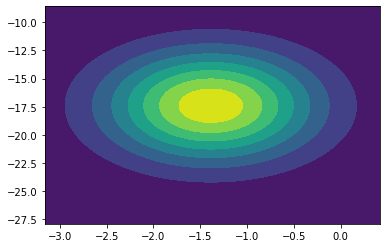

In [67]:
# tu codigo aqui
mu_rotated = np.mean(X_rot, axis=0)
Sigma_rotated = np.cov(X_rot.T)

rv = multivariate_normal(mu_rotated, Sigma_rotated)

xmin, ymin = X_rot.min(axis=0)
xmax, ymax = X_rot.max(axis=0)

x, y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
pos = np.dstack((x, y))
rv = multivariate_normal(mu_rotated, Sigma_rotated)
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(x, y, rv.pdf(pos))

h) Las coordenadas de los nuevos datos se llaman Componentes principales, lo que hicimos fue basicamente el método PCA. Argumente cómo se puede usar PCA para reducir la dimensionalidad de los datos.

Este método se puede usar para reducir la dimensionalidad de los datos ya que se encuentra una transformación lineal de los datos que maximiza la varianza a lo largo de cada eje. Estos componentes proncipales están ordenados por la cantidad de varianza, lo que permite seleccionar solo los primeros componentes principales dados la dimensión que se desea mantener. Así, se puede dimensionar mientras se conserva la varianza dada la transformación lineal.